In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

In [2]:
df = pd.read_csv("../data/student_data.csv", sep=',')

In [3]:
df

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,FinalGrade
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,no,no,4,3,4,1,1,3,6,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,yes,no,5,3,3,1,1,3,4,6
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,yes,no,4,3,2,2,3,3,10,10
3,3,GP,F,15,U,GT3,T,4,2,health,...,yes,yes,3,2,2,1,1,5,2,15
4,4,GP,F,16,U,GT3,T,3,3,other,...,no,no,4,3,2,1,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,390,MS,M,20,U,LE3,A,2,2,services,...,no,no,5,5,4,4,5,4,11,9
353,391,MS,M,17,U,LE3,T,3,1,services,...,yes,no,2,4,5,3,4,2,3,16
354,392,MS,M,21,R,GT3,T,1,1,other,...,no,no,5,5,3,3,3,3,3,7
355,393,MS,M,18,R,LE3,T,3,2,services,...,yes,no,4,4,1,3,4,5,0,10


In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

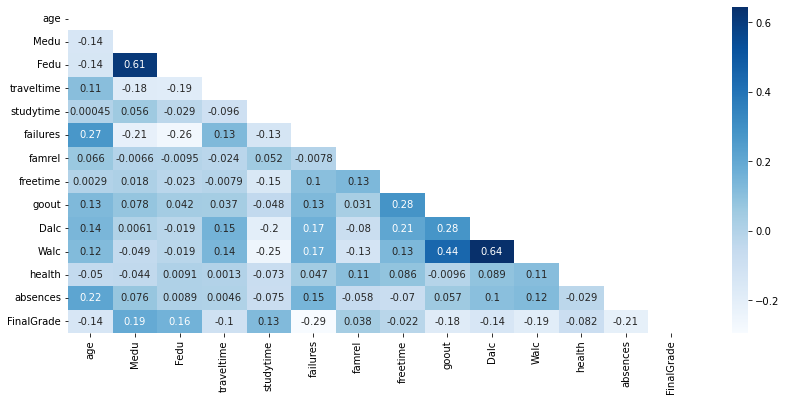

In [5]:
df_new = df.drop("StudentID", axis = 1)
plt.figure(figsize=(14, 6))
h_map = sns.heatmap(df_new.corr(), mask=np.triu(df_new.corr()), annot=True, cmap='Blues')
plt.show()

In [7]:
import statsmodels.api as sm
X = df[['Medu','Fedu','Dalc','Walc','absences','famrel','freetime','health','failures','goout','age','studytime','traveltime',]]
y = df.FinalGrade
mod = sm.OLS(y, X)
results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             FinalGrade   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              387.7
Date:                Sun, 12 Jun 2022   Prob (F-statistic):                   1.86e-196
Time:                        20:47:35   Log-Likelihood:                         -901.71
No. Observations:                 357   AIC:                                      1829.
Df Residuals:                     344   BIC:                                      1880.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Medu           0.5698      0.191      2.982      0.003       0.194       0.946
Fedu           0.1850      0.194      0.955      0.340      -0.196       0.566
Dalc          -0.1360      0.238     -0.571      0.569      -0.605       0.333
Walc           0.0079      0.183      0.043      0.966      -0.353       0.369
absences      -0.0786      0.021     -3.770      0.000      -0.120      -0.038
famrel         0.2408      0.188      1.278      0.202      -0.130       0.611
freetime       0.3027      0.173      1.747      0.081      -0.038       0.643
health        -0.0597      0.117     -0.508      0.611      -0.291       0.171
failures      -1.1001      0.266     -4.142      0.000      -1.622      -0.578
goout         -0.4563      0.177     -2.577      0.010      -0.805      -0.108
age            0.5517      0.071      7.779      0.000       0.412       0.691
studytime      0.4091      0.206      1.990      0.047       0.005       0.813
traveltime     0.0405      0.246      0.165      0.869      -0.443       0.524
==============================================================================
Omnibus:                        1.565   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.457   Jarque-Bera (JB):                1.579
Skew:                           0.101   Prob(JB):                        0.454
Kurtosis:                       2.745   Cond. No.                         34.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
df["ImprovabilityScore"] = (df["traveltime"]+1.4*df["age"]+2.9*df["failures"]+1.8*df["goout"]+1.4*df["Dalc"]+1.9*df["Walc"]+2.1*df["absences"]/18.6-1.3*df["studytime"]*1.25-1.9*df["Medu"]-1.6*df["Fedu"]-10.3)/8.1

In [19]:
df.to_csv("student_data2.csv")

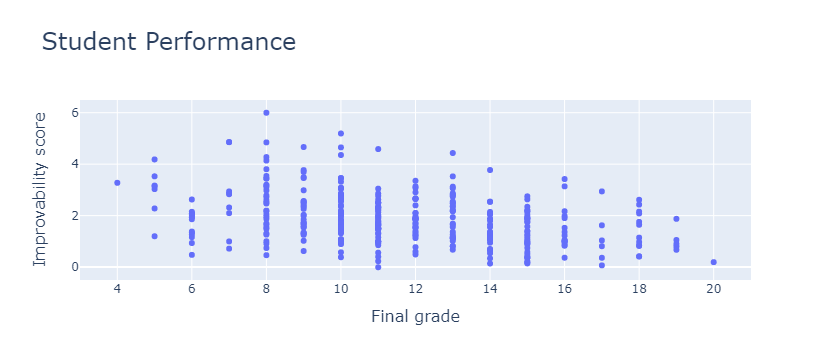

In [20]:
fig = go.Figure(data=[
    go.Scatter(
        y=df["ImprovabilityScore"], x=df['FinalGrade'], 
        mode="markers",
        text=df['StudentID'],
        hovertemplate=
            "<b>Student ID: %{text}</b><br><br>" +
            "Improvability score: %{y:.1f}<br>" +
            "Final grade: %{x:.f}<br>" 
    )
])
fig.update_layout(
    title={"text": "Student Performance", "font": {"size": 24}},
    xaxis={"title": {"text": "Final grade", "font": {"size": 16}}},
    yaxis={"title": {"text": "Improvability score", "font": {"size": 16}}}
)
fig.show()